<a href="https://colab.research.google.com/github/sumitthakur24/ML/blob/master/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haberman data-set:

## Sources:
#### (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
#### (b) Date: March 4, 1999

## Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.

### Data-set Information:
###### 1.No. of Data points=306
###### 2.No. of Variables=4
##### Objective:
To analyse the Haberman Data-set of cancer patient

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#fetching csv file of haberman data set.
haber=pd.read_csv('F:\\software\\py\\haberman dataset\\haberman.csv')
#renaming columns
haber.columns=['Age','Op_Year','Axil_nodes_det','Surv_status']
print(haber.columns)

Index(['Age', 'Op_Year', 'Axil_nodes_det', 'Surv_status'], dtype='object')


## Parameters:
### 1.Age:Age of patient at time of operation (numerical)
### 2.Op_Year:Patient's year of operation (year - 1900, numerical)
### 3.Axil_nodes_det:Number of positive axillary nodes detected (numerical)
### 4.Surv_status:Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [0]:
print(haber.head())

   Age  Op_Year  Axil_nodes_det  Surv_status
0   30       62               3            1
1   30       65               0            1
2   31       59               2            1
3   31       65               4            1
4   33       58              10            1


In [0]:
print(haber.shape)

(305, 4)


In [0]:
haber['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [0]:
haber.describe()

,Age,Op_Year,Axil_nodes_det,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observation :
###### 1.Number of people survived 5 years or longer are 225.
###### 2.Number of people who died within 5 years are 81.
###### 3.This is an imbalanced dataset.

## UNIVARIATE ANALYSIS:

### 1.Probability Density Function(PDF):

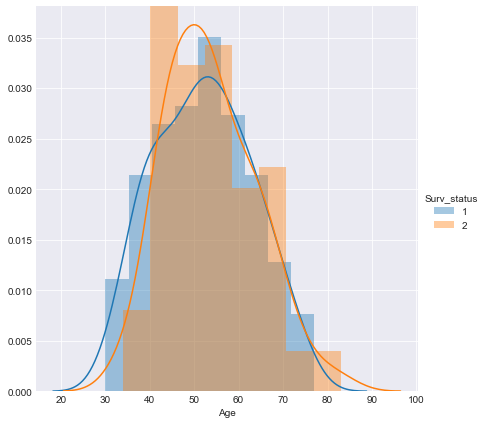

In [0]:
#plotting PDF on the basis of 'Age' of patient.
sns.set_style("darkgrid")
sns.FacetGrid(haber,hue="Surv_status",size=6).map(sns.distplot,"Age").add_legend();
plt.show();

### Observation:
##### Mostly  the age of 40-45 years old people  died  before 5 years.

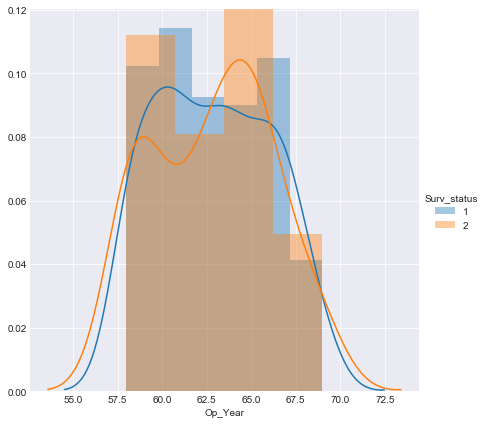

In [0]:
#plotting PDF on the basis of 'Op_Year' of patient.
sns.set_style("darkgrid")
sns.FacetGrid(haber,hue="Surv_status",size=6).map(sns.distplot,"Op_Year").add_legend();
plt.plot();

### Observation:
##### Most of the patient had died From 1963-66 before 5 years.

[]

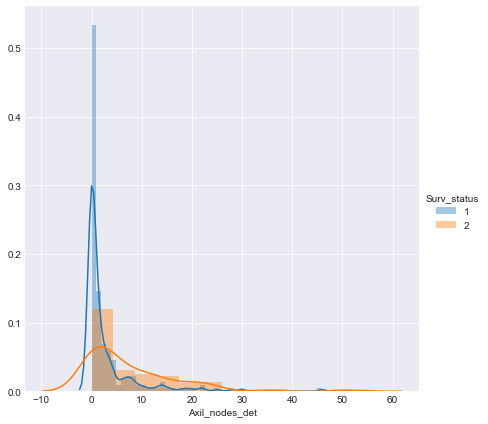

In [0]:
#plotting PDF on the basis of 'Axil_nodes_det'.
sns.set_style('darkgrid')
sns.FacetGrid(haber,hue='Surv_status',size=6).map(sns.distplot,'Axil_nodes_det').add_legend()
plt.plot()

### Observation:
##### Most of the patient had 0-2 lymph nodes survived more then 5 years.

### 2.Comulative Distributive Function(CDF):

For patient survived [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
For patient died [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


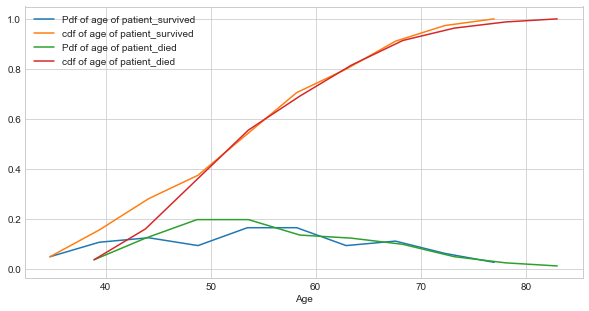

In [0]:
patient_survived=haber.loc[haber["Surv_status"]==1]
patient_died=haber.loc[haber["Surv_status"]==2]
#plotting CDF of Age of patient ,survived after 5 years
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.xlabel("Age")
counts,bin_edges=np.histogram(patient_survived["Age"], bins=10, density=True)
pdf=counts/(sum(counts))
print("For patient survived",pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf , label="Pdf of age of patient_survived")
plt.plot(bin_edges[1:],cdf , label="cdf of age of patient_survived")
#plotting CDF of Age of patient ,died before 5 years
counts, bin_edges=np.histogram(patient_died["Age"], bins=10, density=True)
print("For patient died",pdf)
print(bin_edges)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label="Pdf of age of patient_died")
plt.plot(bin_edges[1:], cdf,  label="cdf of age of patient_died")
plt.legend()
plt.show()

For patient survived : [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
For patient died : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


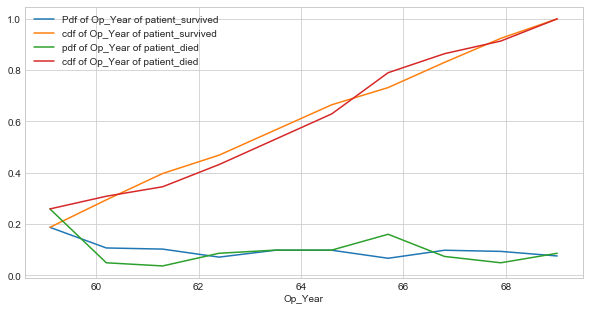

In [0]:
plt.figure(figsize=(10,5))
#plotting CDF of 'Op_Year' of patient ,survived after 5 years
sns.set_style("whitegrid")
plt.xlabel("Op_Year")
counts, bin_edges=np.histogram(patient_survived["Op_Year"], bins=10, density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
print("For patient survived :",pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf, label="Pdf of Op_Year of patient_survived")
plt.plot(bin_edges[1:],cdf, label="cdf of Op_Year of patient_survived")
#plotting CDF of 'Op_Year' of patient ,died before 5 years
counts, bin_edges=np.histogram(patient_died["Op_Year"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print("For patient died :", pdf)
print(bin_edges)
plt.plot(bin_edges[1:], pdf, label="pdf of Op_Year of patient_died")
plt.plot(bin_edges[1:], cdf, label="cdf of Op_Year of patient_died")
plt.legend()
plt.show()

For patient Survived : [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
For patient died [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


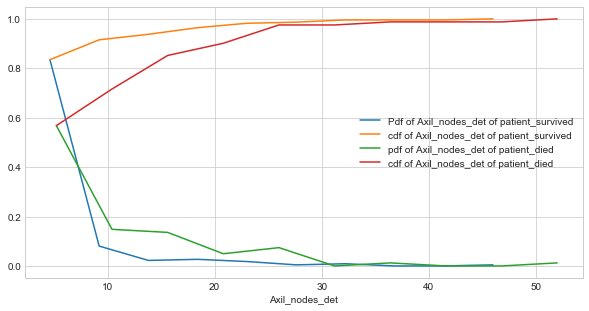

In [0]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.xlabel('Axil_nodes_det')
#plotting CDF of 'Axil_nodes_det' of patient ,survived after 5 years
counts, bin_edges=np.histogram(patient_survived['Axil_nodes_det'], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print("For patient Survived :", pdf)
print(bin_edges)
plt.plot(bin_edges[1:], pdf, label="Pdf of Axil_nodes_det of patient_survived")
plt.plot(bin_edges[1:], cdf ,label="cdf of Axil_nodes_det of patient_survived")
#plotting CDF of 'Axil_nodes_det' of patient ,died before 5 years
counts, bin_edges=np.histogram(patient_died["Axil_nodes_det"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print("For patient died", pdf)
print(bin_edges)
plt.plot(bin_edges[1:], pdf, label="pdf of Axil_nodes_det of patient_died")
plt.plot(bin_edges[1:], cdf, label="cdf of Axil_nodes_det of patient_died")
plt.legend()
plt.show()

### Observation:
###### CDF gives the percentile value of patient who live after 5 years and dead before 5 years.

### 3.Box Plots

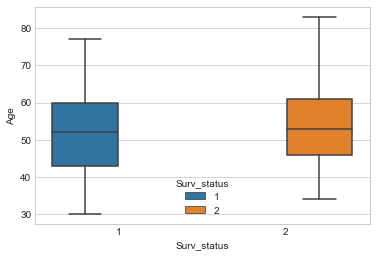

In [0]:
#box plot using Age of patient
sns.boxplot(x="Surv_status", y="Age",hue="Surv_status" , data=haber)
plt.show()

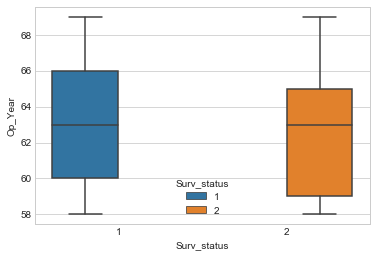

In [0]:
#box plot using Op_Year of paatient
sns.boxplot(x="Surv_status", y="Op_Year", hue="Surv_status", data=haber)
plt.show()

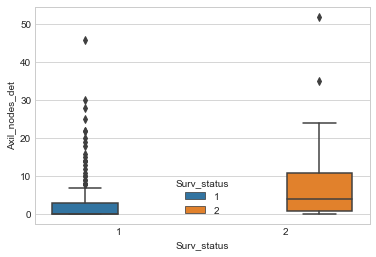

In [0]:
#boxplot using Axil_nodes_det 
sns.boxplot(x="Surv_status", y="Axil_nodes_det", hue="Surv_status", data=haber)

## Plotting violin plot

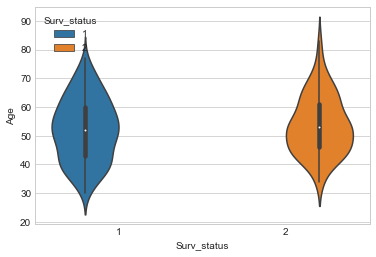

In [0]:
#violin plot using Age
sns.violinplot(x="Surv_status", y="Age", hue="Surv_status", data=haber)
plt.show()

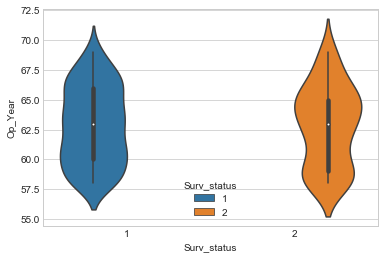

In [0]:
#plotting as per Op_Year 
sns.violinplot(x="Surv_status", y="Op_Year", hue="Surv_status", data=haber)
plt.show()

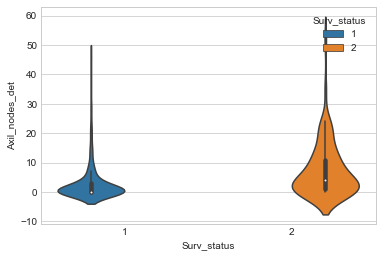

In [0]:
#plotting as per Axil_nodes_det
sns.violinplot(x="Surv_status", y="Axil_nodes_det", hue="Surv_status", data=haber)
plt.show()

## Bi-Variate Analysis

### 1.Pair Plots:

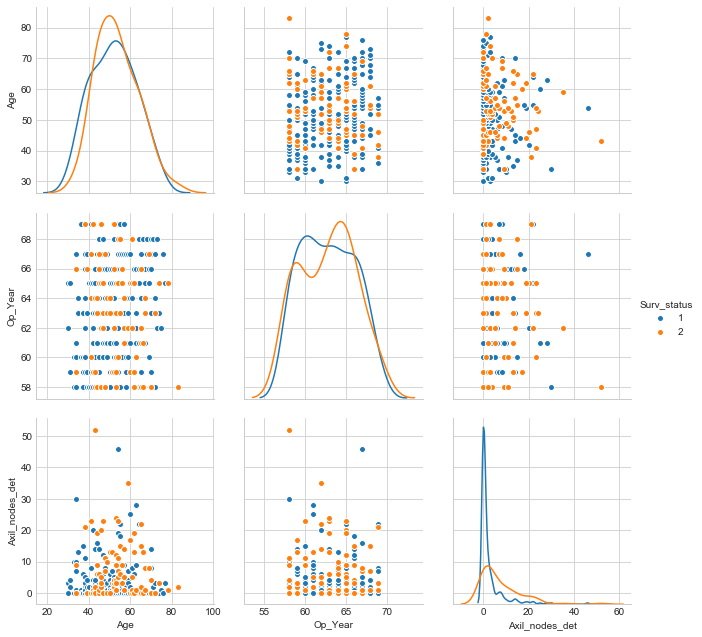

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.pairplot(haber, vars=['Age','Op_Year','Axil_nodes_det'],hue='Surv_status',diag_kind='kde',size=3)
plt.show()

### 2.Multivariate probability density, contour plot:

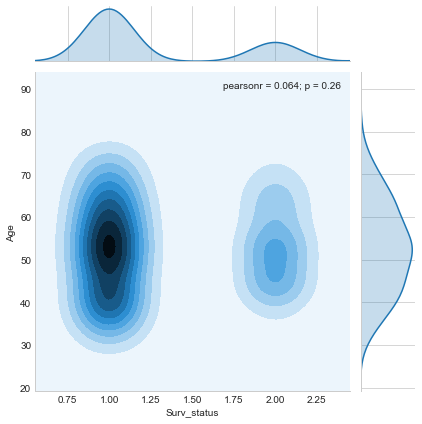

In [0]:
sns.jointplot(x="Surv_status" , y="Age", data=haber, kind="kde")
plt.show()